In [1]:
from pickletools import optimize
import pycaret.classification as clf
from sklearn.metrics import log_loss

import time
import datetime
import argparse

import utils as my


## https://www.kaggle.com/datasets/paresh2047/uci-semcom
dataset_path = "../../hackathon/data/uci-secom.csv"
target_name = "Pass/Fail"

In [2]:
## Parameters
model_filename = "base-101"
model_names = ['rf', 'gbc', 'et']                    ## 'xgboost', 'lightgbm', 'catboost'
model_params = {name: {} for name in model_names}    ## model_params['rf'] = dict(max_depth=5)
model_grids = {name: None for name in model_names}   ## model_grids['rf'] = dict(max_depth=[5, 10])

preprocessing = dict(
    ignore_features=['Time'],
    categorical_features=None,
    ordinal_features=None,
    numeric_features=None,
    date_features=None,

    bin_numeric_features=None,
    high_cardinality_features=None,
    group_features=None,
)

In [3]:
from types import SimpleNamespace

args = SimpleNamespace()
args.train_size = 0.75
args.seed = 123

args.use_gpu = False
args.save = True
args.verbose = False

args.models = model_names
args.metric = 'LogLoss'
args.n_folds = 10
args.n_iter = 10
args.n_top = 3

train, test = my.get_data(dataset_path, args.train_size, args.seed, target_name=target_name)

Train Data: (1175, 592)
Test  Data: (392, 592) 



Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._voting.VotingClassifier'>
>> ['et', 'rf', 'gbc']
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.      F1  LogLoss Tact
0          0.9498  1.0  0.2436    1.0  0.3918   0.0931     


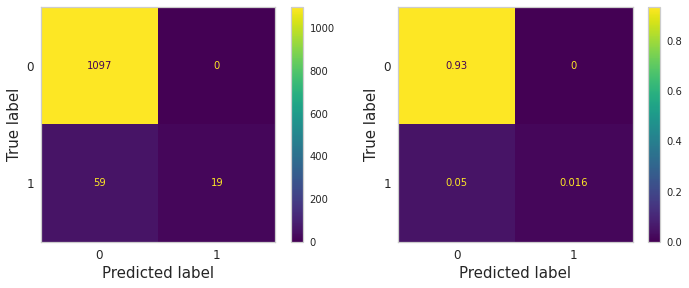

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.   F1  LogLoss Tact
0          0.9337  0.7736     0.0    0.0  0.0   0.2169     


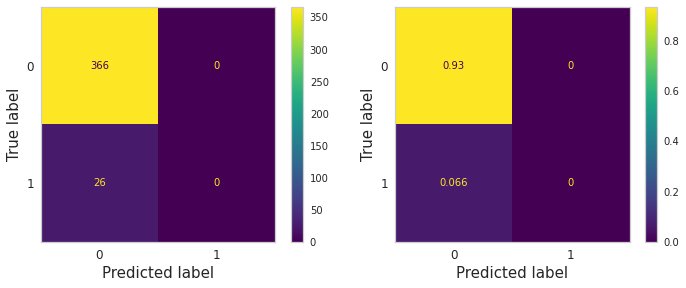

In [4]:
model_name = "base-001__train__Accuracy-0.9498_AUC-1.0000__test__Accuracy-0.9337_AUC-0.7736__seed-123"
model = clf.load_model(model_name)
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
>> Train scores:
   Model  Accuracy     AUC  Recall  Prec.      F1  LogLoss Tact
0          0.9396  0.9887  0.0897    1.0  0.1647   0.1415     


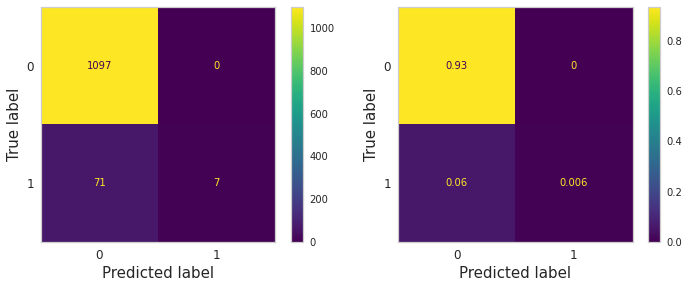

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.   F1  LogLoss Tact
0          0.9337  0.7459     0.0    0.0  0.0   0.2242     


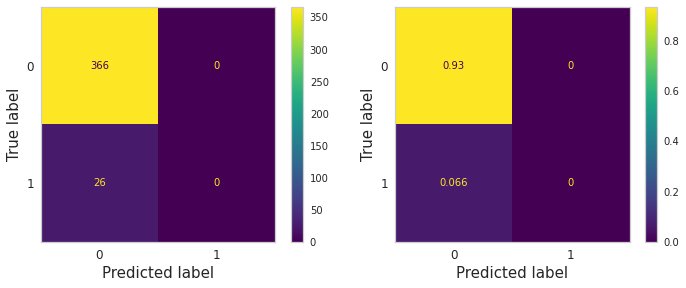

In [5]:
model_name = "base-101__train__Accuracy-0.9396_AUC-0.9887__test__Accuracy-0.9337_AUC-0.7459__seed-123"
model = clf.load_model(model_name)
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._voting.VotingClassifier'>
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.   F1  LogLoss Tact
0             1.0  1.0     1.0    1.0  1.0   0.0426     


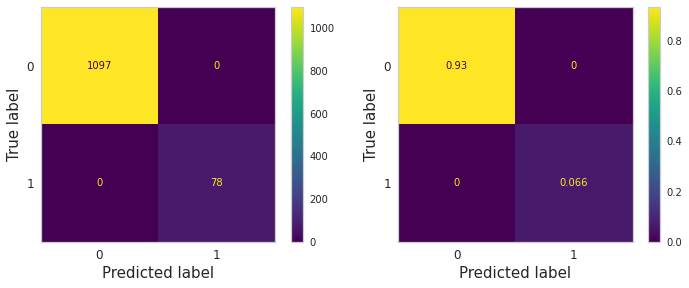

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.   F1  LogLoss Tact
0          0.9209  0.7007     0.0    0.0  0.0    0.262     


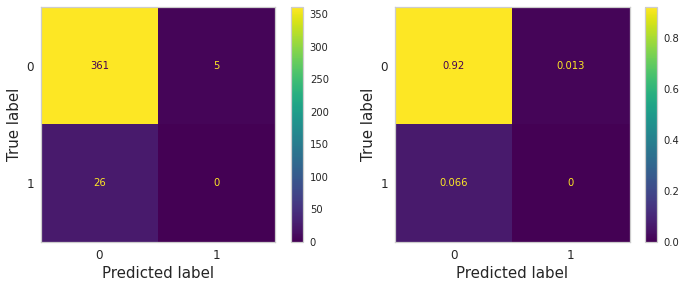

In [7]:
model_name = "base-002__train__Accuracy-1.0000_AUC-1.0000__test__Accuracy-0.9209_AUC-0.7007__seed-123"
model = clf.load_model(model_name)
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])